In [2]:
#Imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

file_path = '../Data/Raw_data/application_train.csv'
df_train = pd.read_csv(file_path)

print("Data loaded successfully!!")


Data loaded successfully!!


In [4]:
print("--- First 5 Rows ---")
print(df_train.head())

--- First 5 Rows ---
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied      

In [5]:
print("\n--- DataFrame Info ---")
print(df_train.info())


--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


In [6]:
print("\n--- Descriptive Statistics ---")
print(df_train.describe())


--- Descriptive Statistics ---
          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385

Percentage of loans repaid (Target 0): 91.93%
Percentage of loans defaulted (Target 1): 8.07%


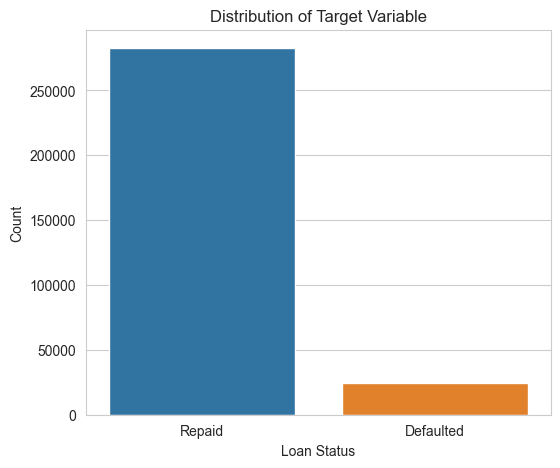

In [7]:
sns.set_style('whitegrid')

target_counts = df_train['TARGET'].value_counts(normalize=True) * 100
print(f"Percentage of loans repaid (Target 0): {target_counts[0]:.2f}%")
print(f"Percentage of loans defaulted (Target 1): {target_counts[1]:.2f}%")

plt.figure(figsize=(6, 5))
sns.countplot(x='TARGET', data=df_train, hue='TARGET', legend=False)
plt.title('Distribution of Target Variable')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Repaid', 'Defaulted'])
plt.show()

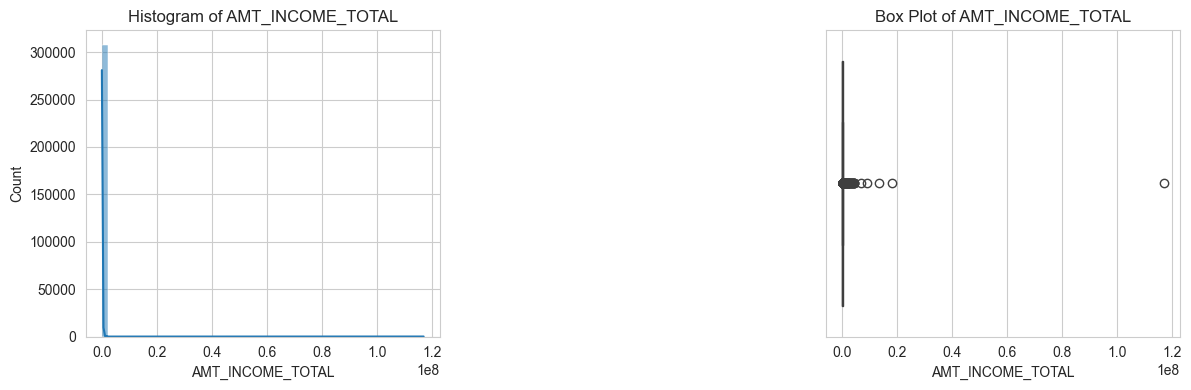

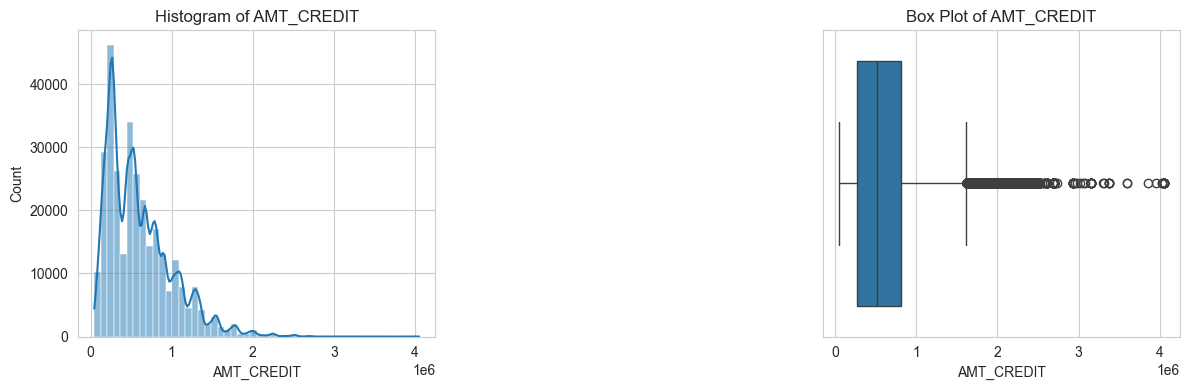

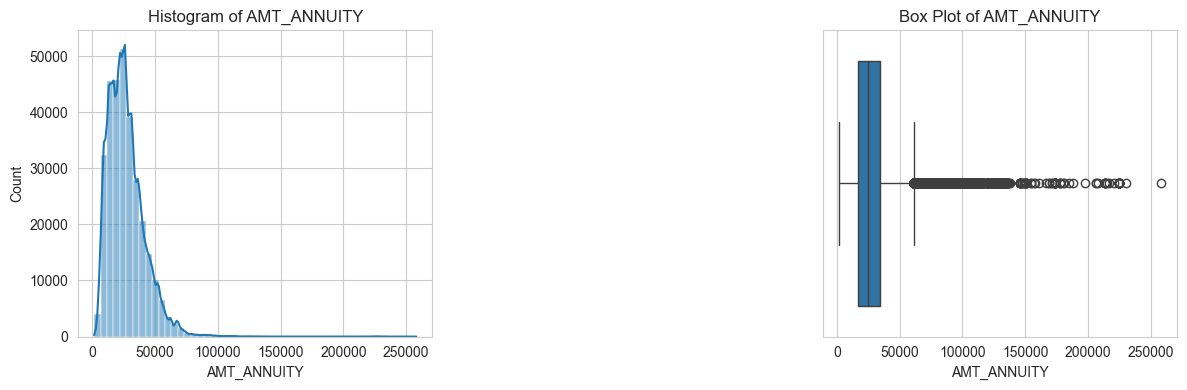

In [8]:
numerical_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']

# Create plots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(12, 4))

    # Plot histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df_train[col], bins=50, kde=True)
    plt.title(f'Histogram of {col}')

    # Plot box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(x=df_train[col])
    plt.title(f'Box Plot of {col}')

    plt.tight_layout()
    plt.show()

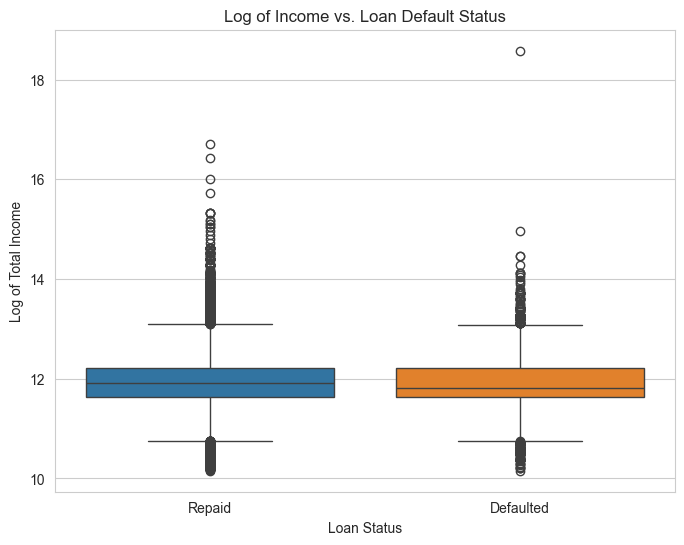

In [9]:
df_train['LOG_INCOME'] = np.log(df_train['AMT_INCOME_TOTAL'] + 1)

plt.figure(figsize=(8, 6))
sns.boxplot(x='TARGET', y='LOG_INCOME', data=df_train, hue='TARGET', legend=False)
plt.title('Log of Income vs. Loan Default Status')
plt.xlabel('Loan Status')
plt.ylabel('Log of Total Income')
plt.xticks([0, 1], ['Repaid', 'Defaulted'])
plt.show()

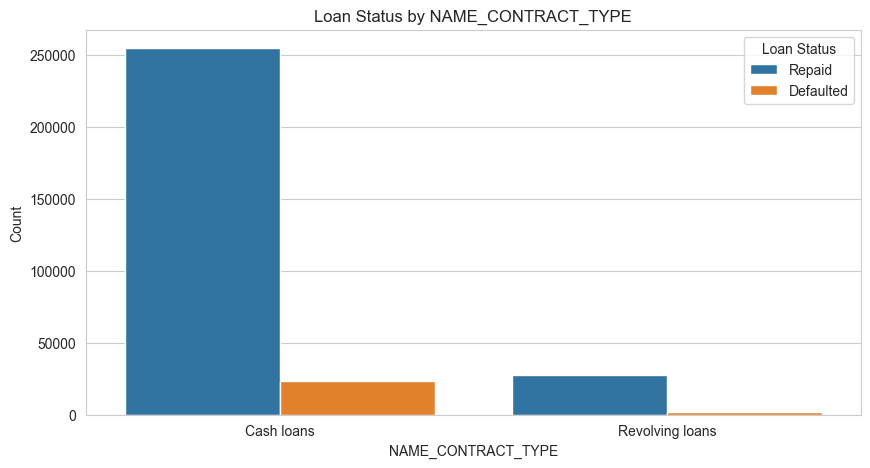

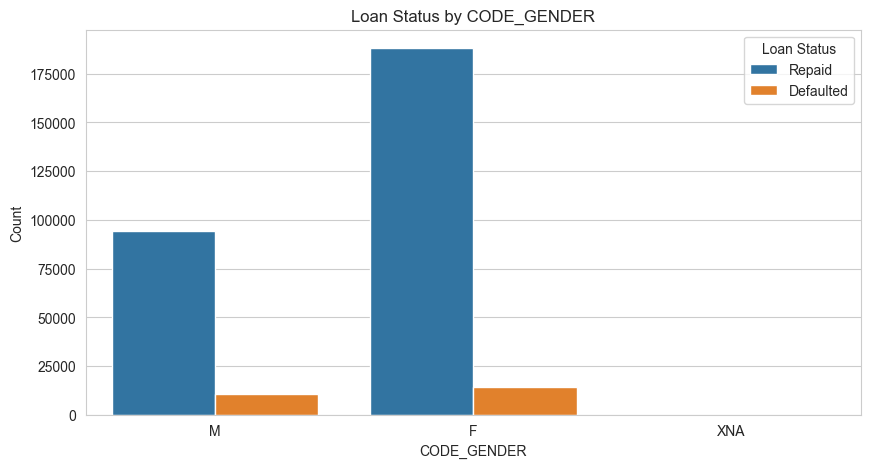

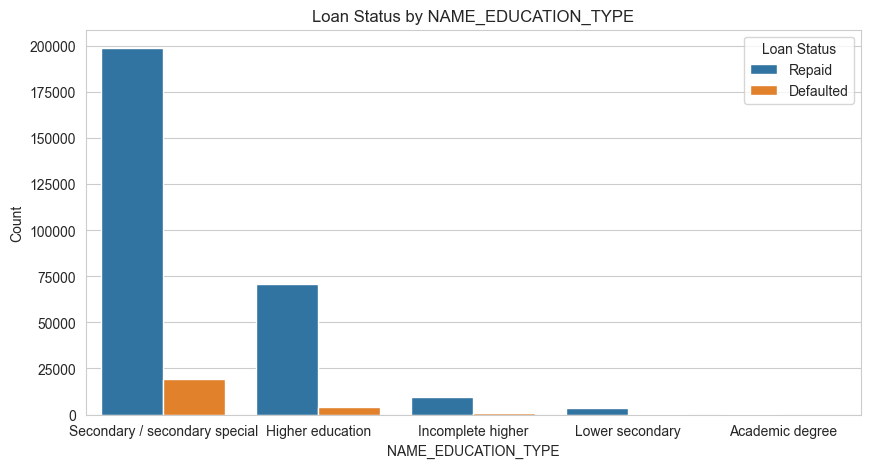

In [10]:
categorical_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_EDUCATION_TYPE']

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df_train, hue='TARGET')
    plt.title(f'Loan Status by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Loan Status', labels=['Repaid', 'Defaulted'])
    plt.show()